# Imports and data read in 

In [1]:
from pat_tools import feat_and_lab, decision_tree, plot_conmat, make_conmat, impute_features, screen_time_split, Dataset
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
alspac = Dataset("Data.csv", "ALSPAC")

# Extract features and labels
alspac.features, alspac.labels = feat_and_lab(alspac.data)

label = 'has_dep_diag'

# Analysis

## Split features into screen-time/non screen-time

In [3]:
# Impute missing features
alspac.features = impute_features(alspac.features)

# Split features into screen-time/non screen-time
alspac.sfeatures, alspac.nsfeatures = screen_time_split(alspac.features, "ALSPAC")

## Decision tree

In [4]:
# Decision tree
test, pred, tree = decision_tree(alspac.sfeatures, alspac.labels, chosen_label=label)
alspac.sconmat = make_conmat(pred, test)

# Decision tree
test, pred, tree = decision_tree(alspac.nsfeatures, alspac.labels, chosen_label=label)
alspac.nsconmat = make_conmat(pred, test)

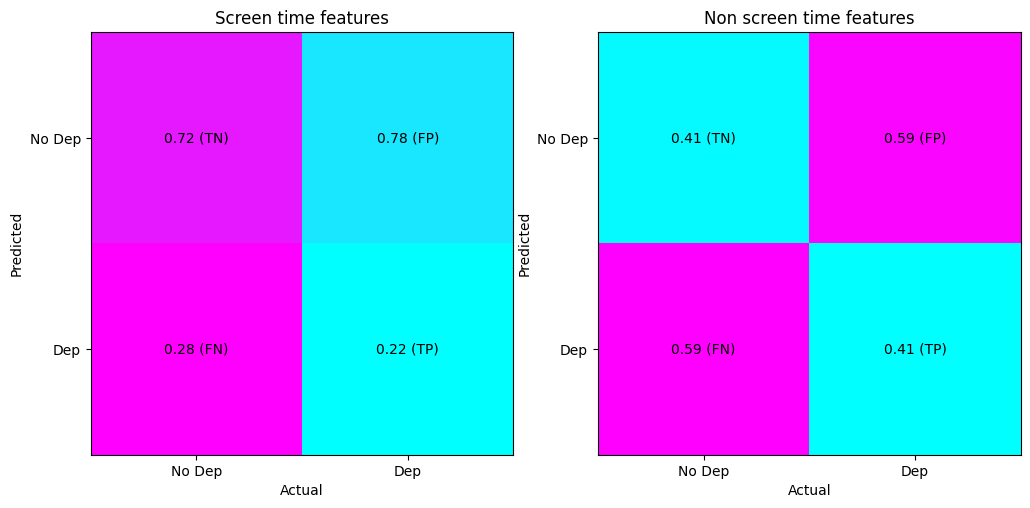

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6), dpi=100)

ax[0] = plot_conmat(alspac.sconmat, ax[0])
ax[1] = plot_conmat(alspac.nsconmat, ax[1])

ax[0].set(title = "Screen time features")
ax[1].set(title = "Non screen time features")

plt.show()

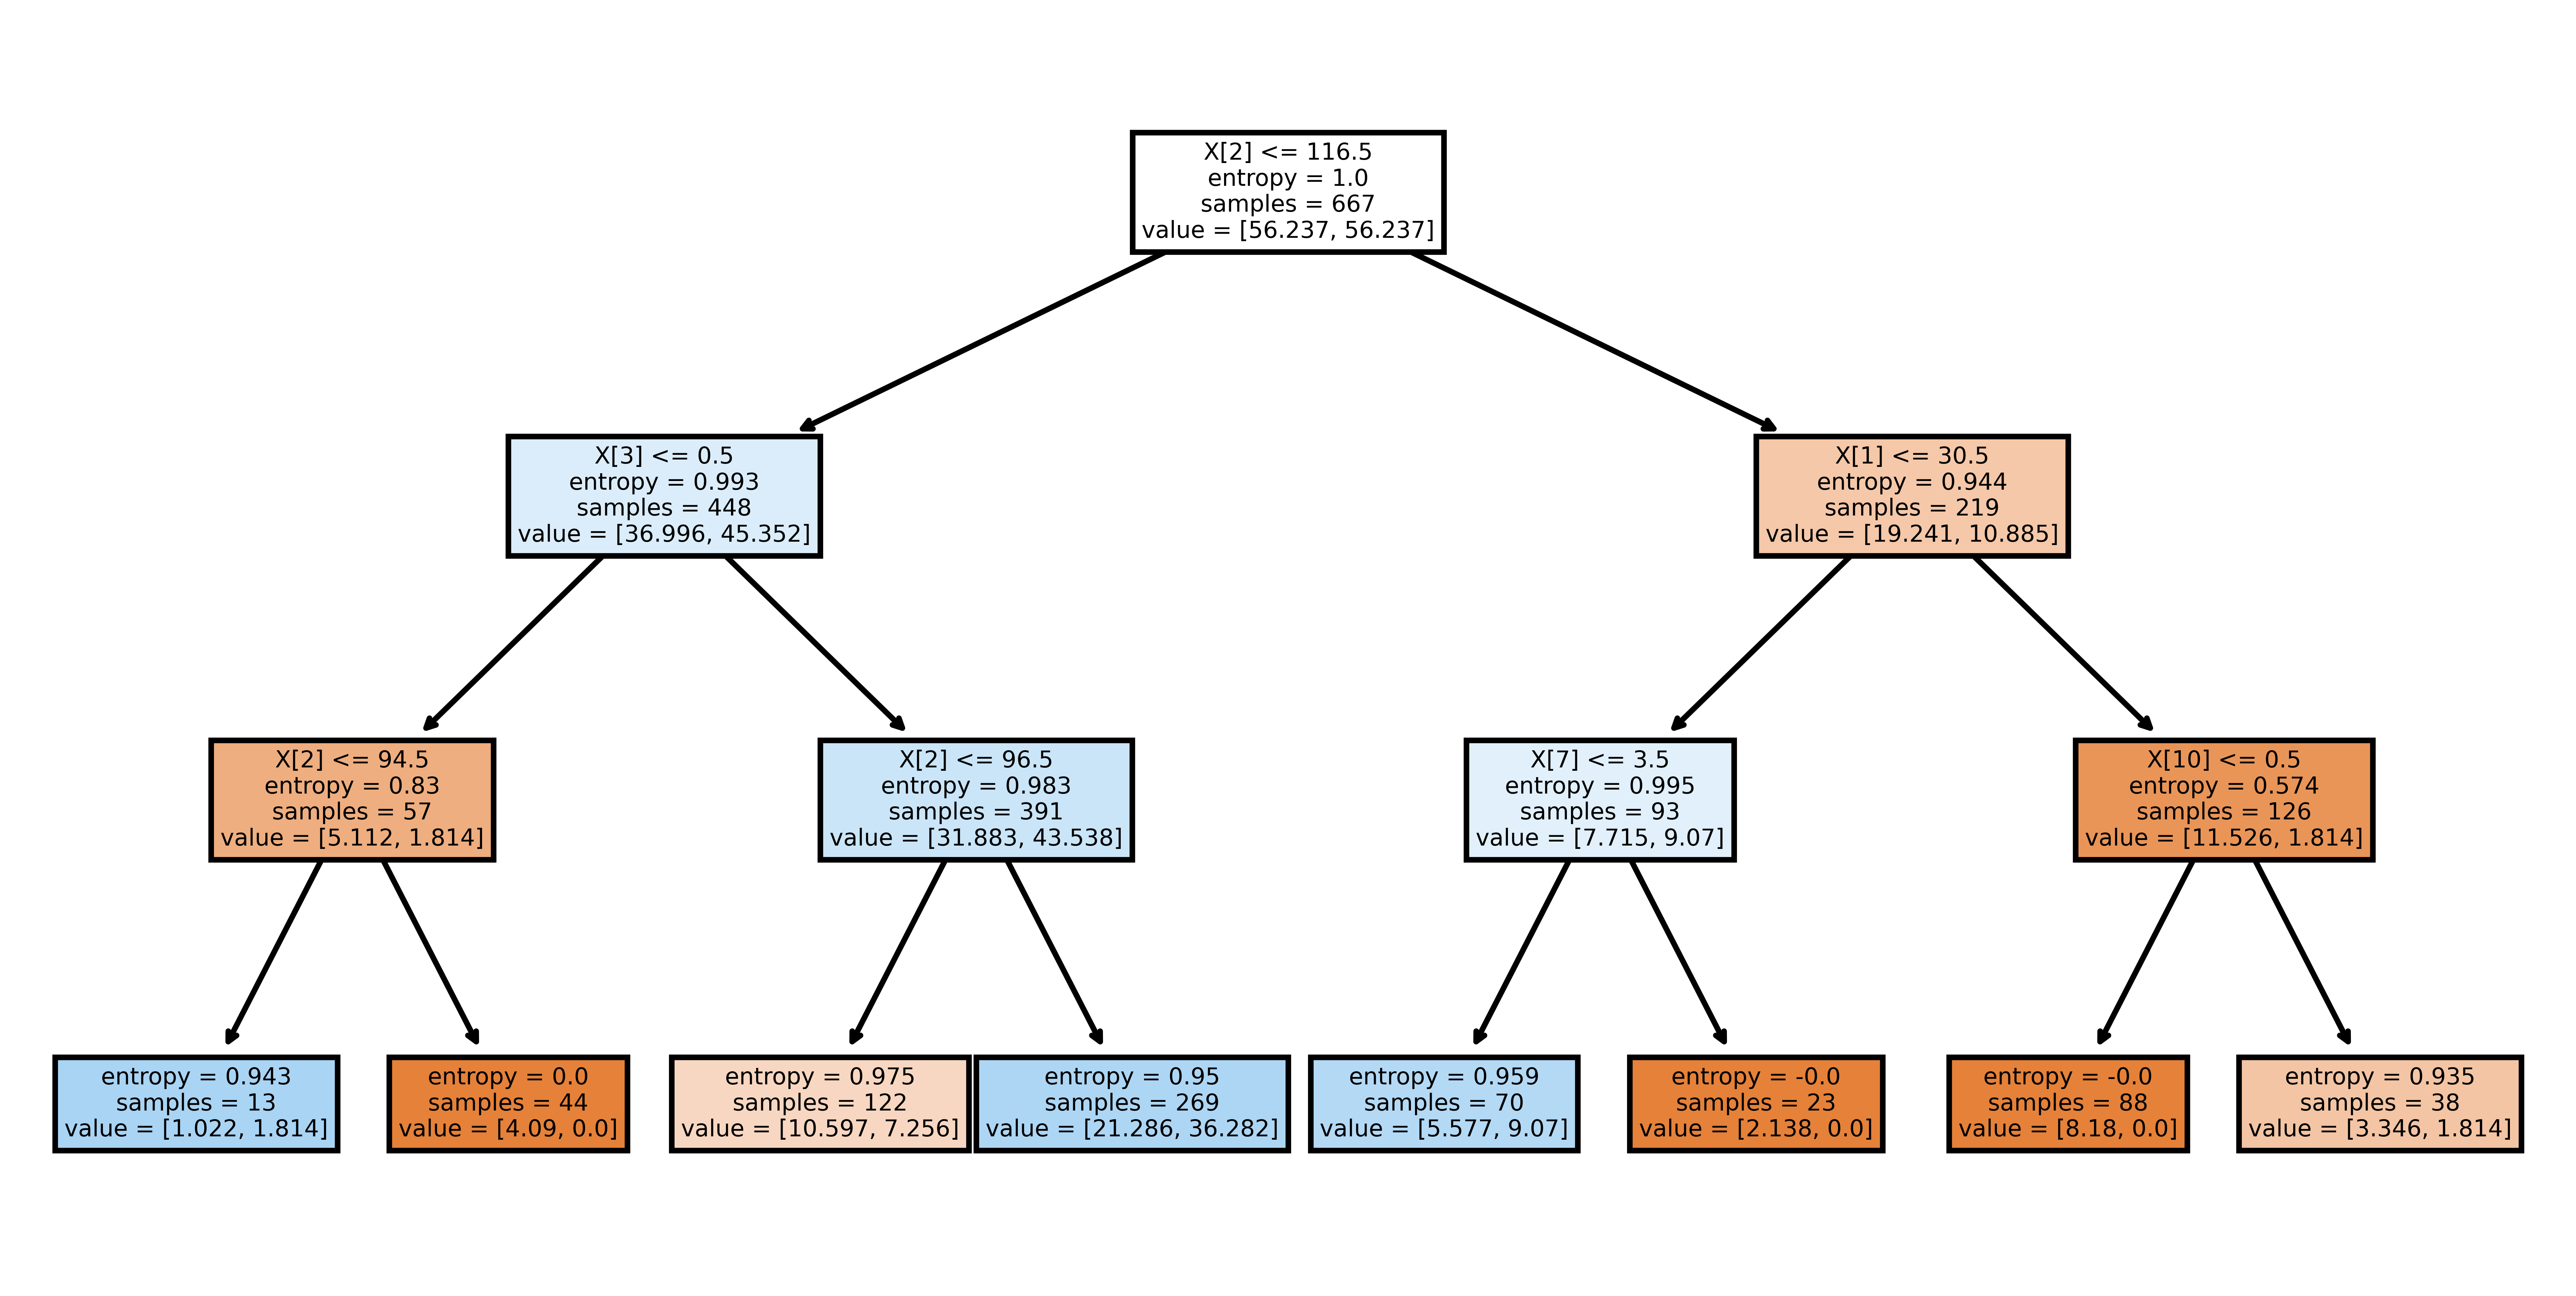

In [6]:
fig, ax = plt.subplots(figsize=(8,4), dpi=1200)

plot_tree(tree, ax=ax, filled=True)
plt.show()